# Episode 2
- Checking for Correlation between countries.
- Foreign-Exchange Reserve???


*Data Source: www.data.gov.my*

[Import Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-import-sources)

[Export Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-export-destination)

In [1]:
# Original file was encoded in 'iso-8859-1'
import numpy as np
import pandas as pd

MY_export = pd.read_csv('Major Export Destination.csv')
MY_import = pd.read_csv('Major Import Sources.csv')

df = pd.concat([MY_export, MY_import['Total Import (USD)']], axis=1)

# Change column names
df.columns = ['Year', 'Month', 'Country', 'Country Code', 'Export', 'Import']

In [2]:
# Re-arranging by Country and Month 
df = df.groupby(['Country','Month'])['Export','Import'].sum()
df['Surplus'] = df['Export'] - df['Import']

In [3]:
df.groupby(level=0).sum().head()

,Export,Import,Surplus
Country,,,
AFGHANISTAN,84969608,188664,84780944
ALBANIA,10422383,593682,9828701
ALGERIA,123169891,936429,122233462
AMERICAN SAMOA,13605850,356679,13249171
ANDORRA,207537,882,206655


In [4]:
ByMonth = df.groupby(level=1).sum()

In [5]:
import matplotlib.pyplot as plt
# Most active Month
 
MonthPct = ByMonth.pct_change()

fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

MonthPct['Export'].plot(title='Export', ax=axs[0])
MonthPct['Import'].plot(title='Import', ax=axs[1])
MonthPct['Surplus'].plot(           title='Surplus',ax=axs[2])

MonthPct.plot(title='Combined')

fig.suptitle('Monthly Change %')
plt.show()

<Figure size 1000x500 with 3 Axes>

<Figure size 640x480 with 1 Axes>

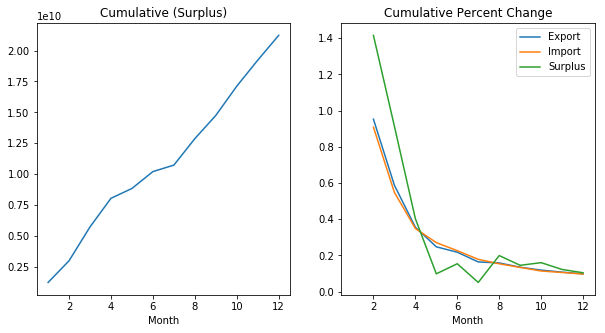

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
ByMonth['Surplus'].cumsum().plot(title='Cumulative (Surplus)', ax=axs[0])
ByMonth.cumsum().pct_change().plot(title='Cumulative Percent Change', ax=axs[1])
plt.show()

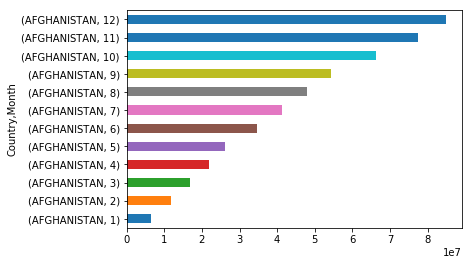

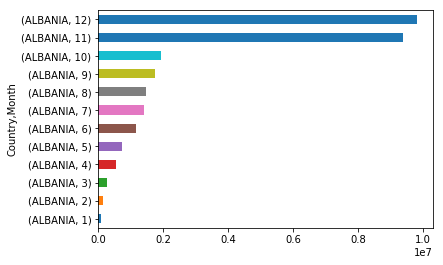

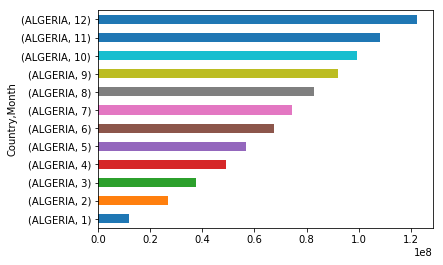

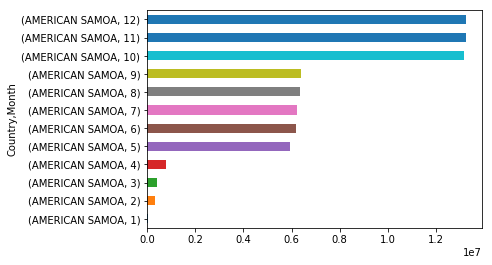

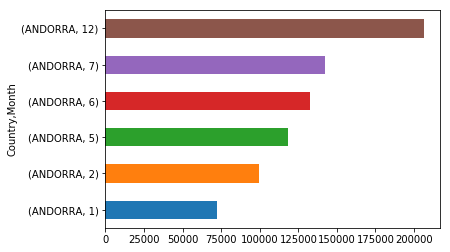

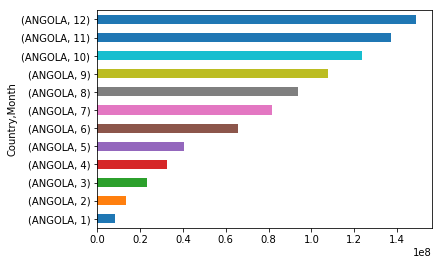

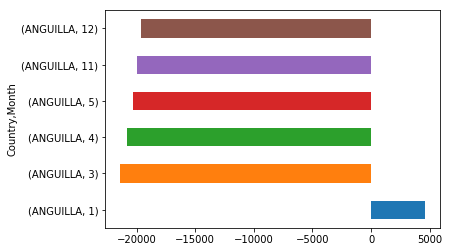

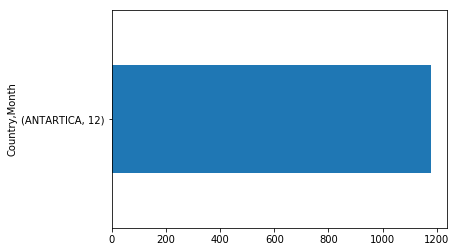

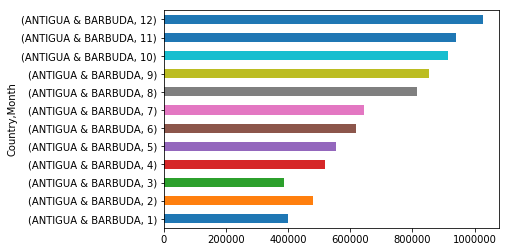

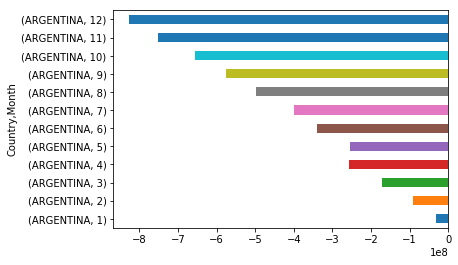

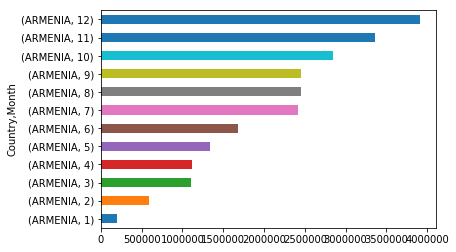

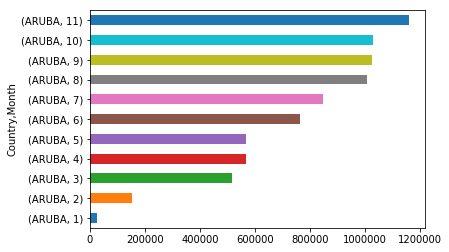

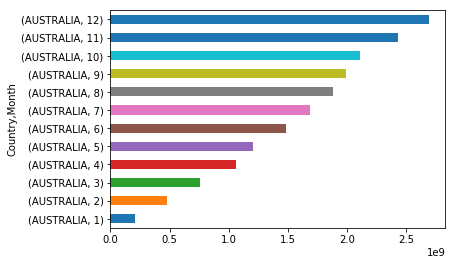

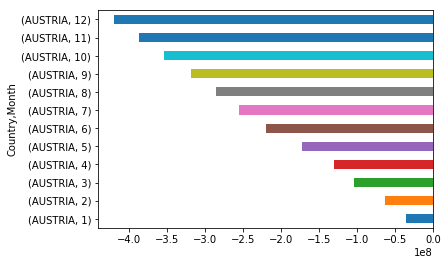

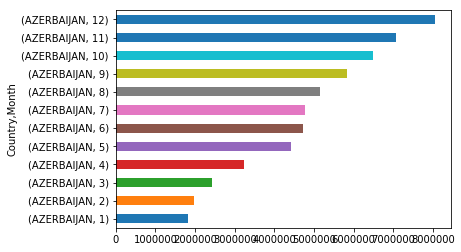

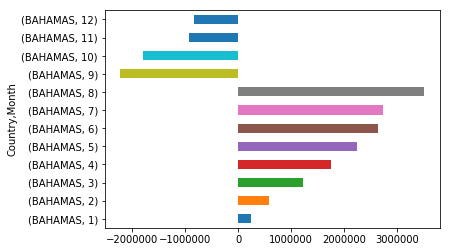

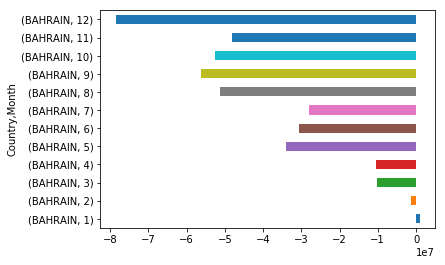

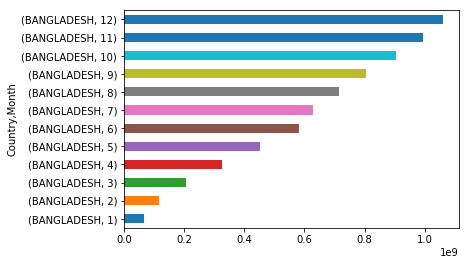

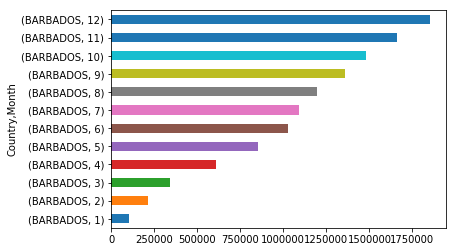

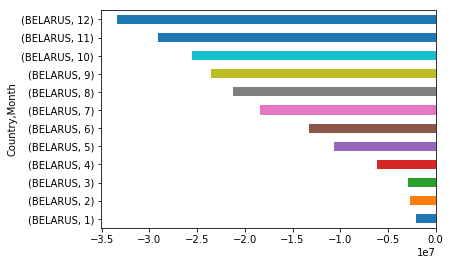

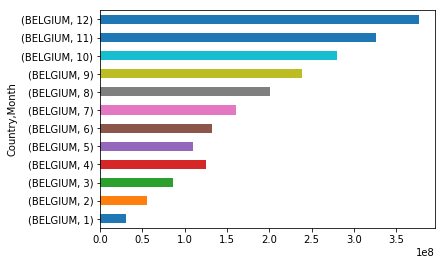

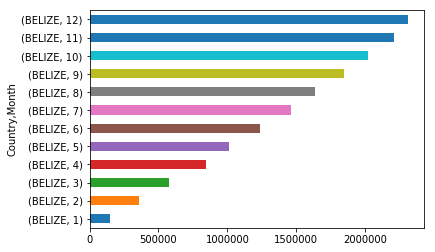

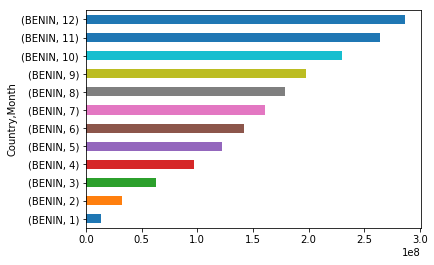

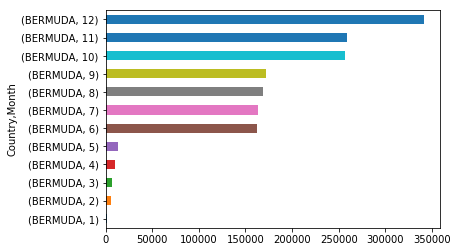

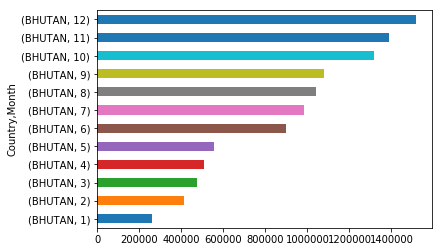

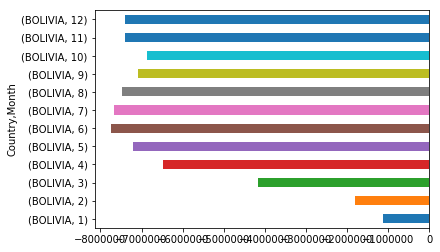

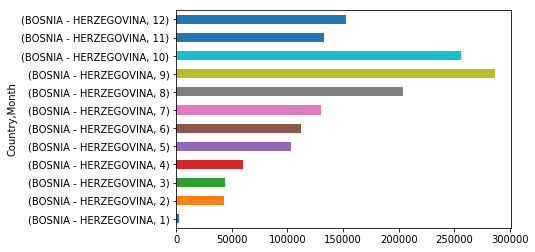

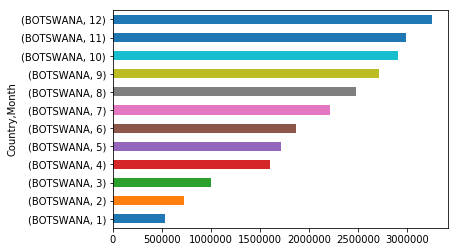

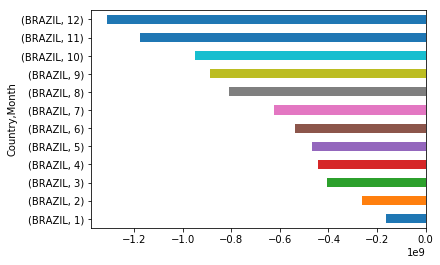

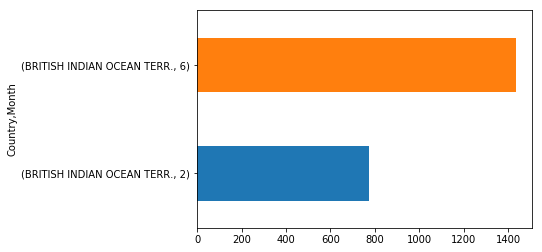

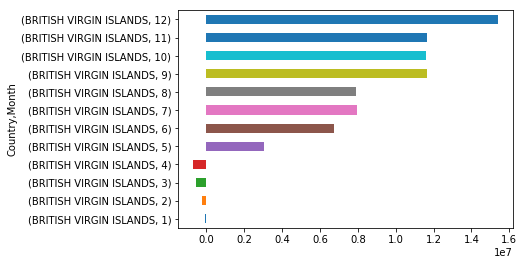

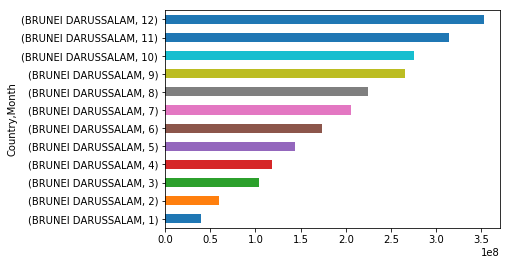

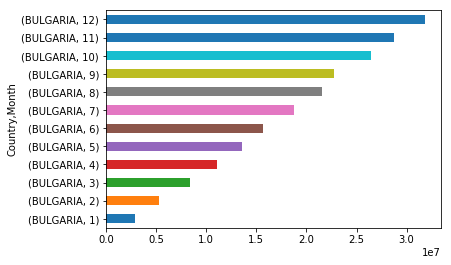

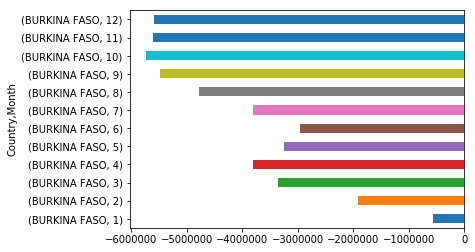

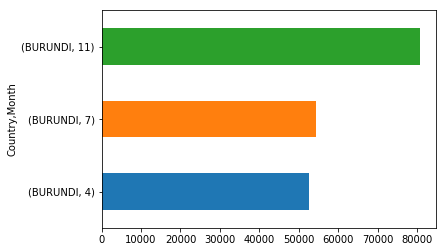

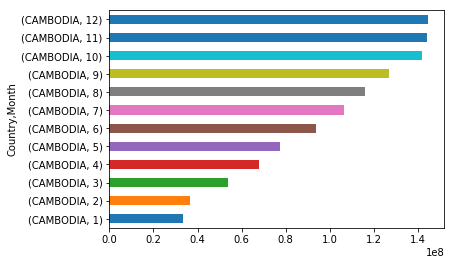

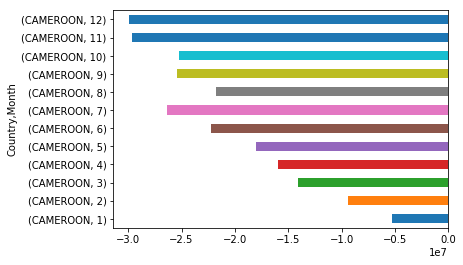

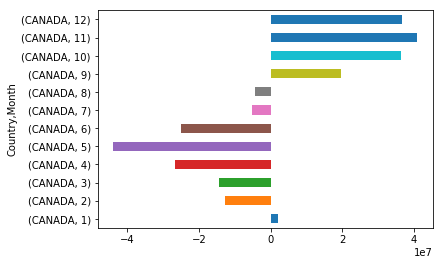

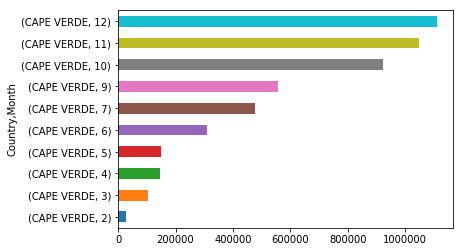

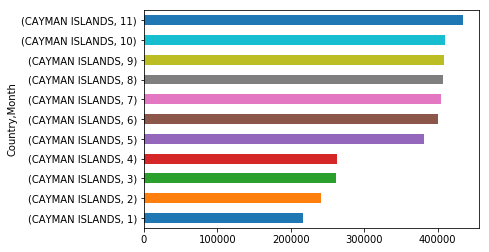

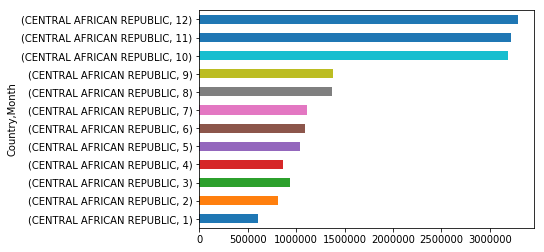

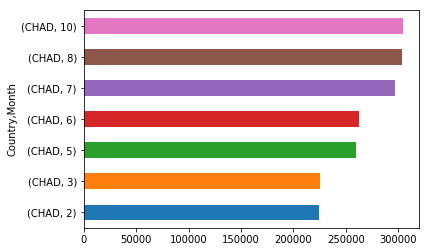

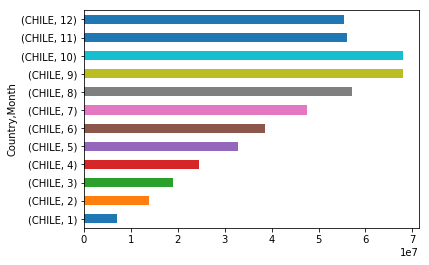

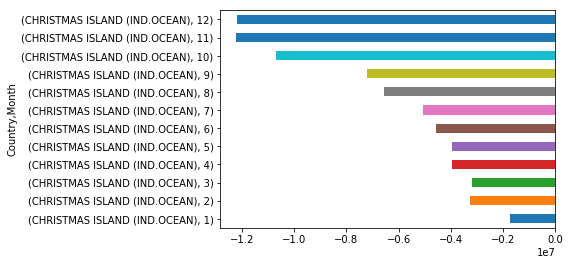

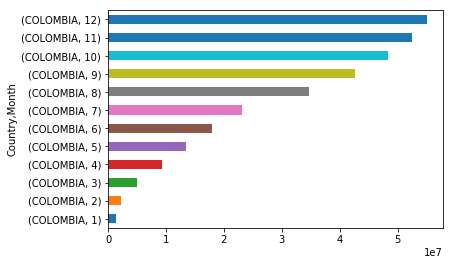

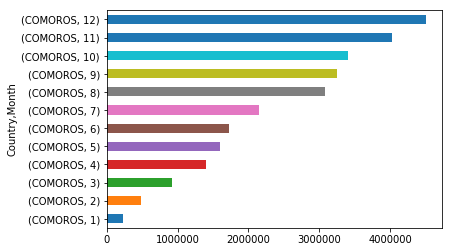

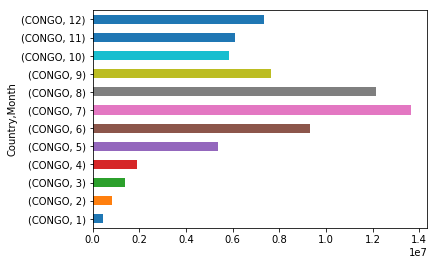

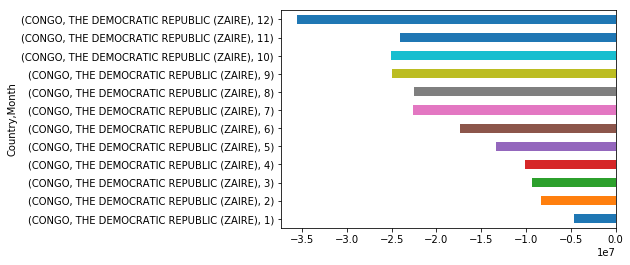

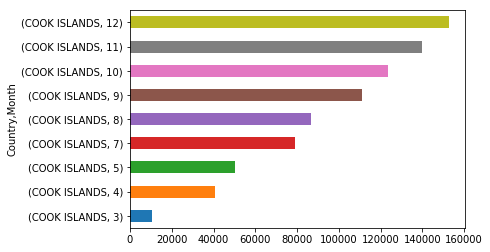

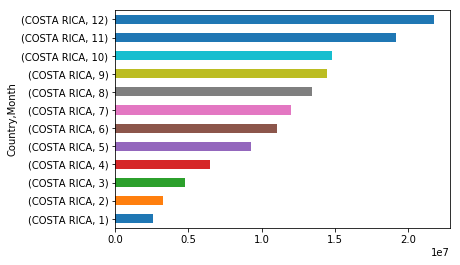

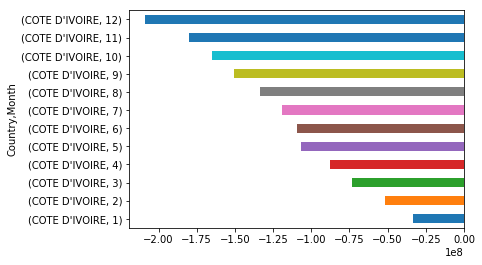

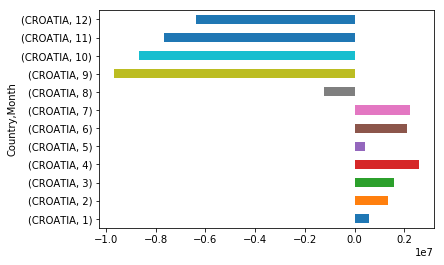

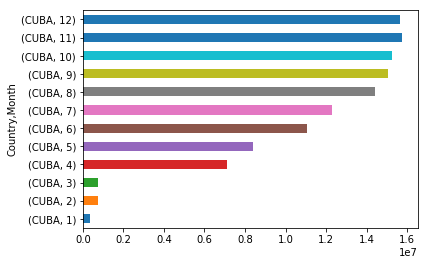

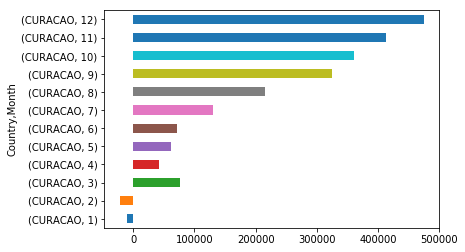

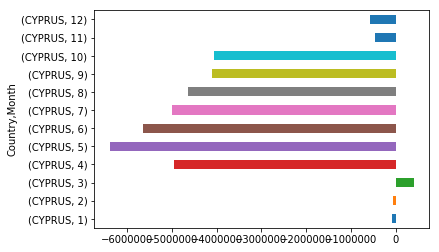

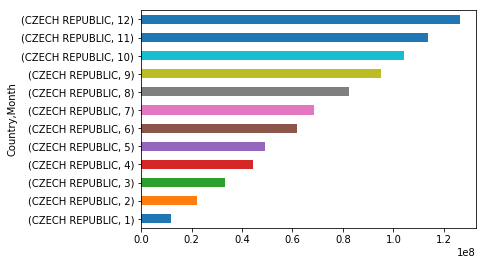

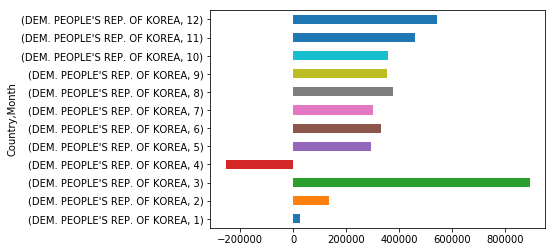

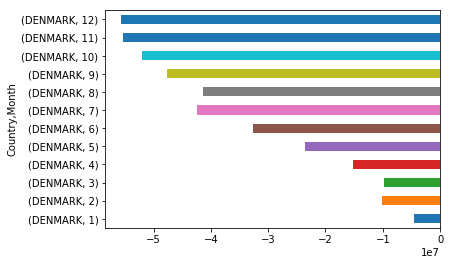

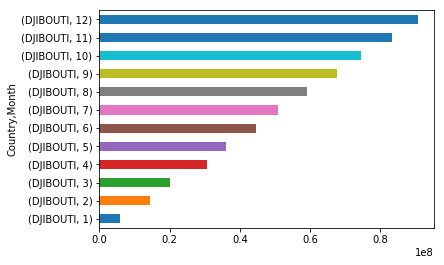

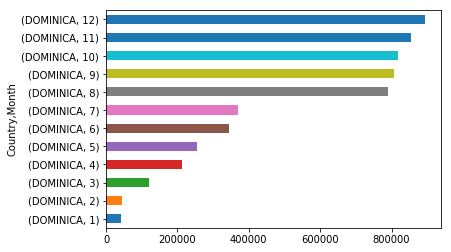

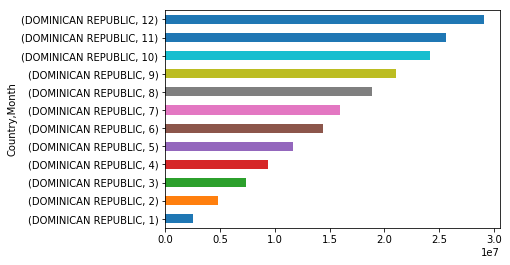

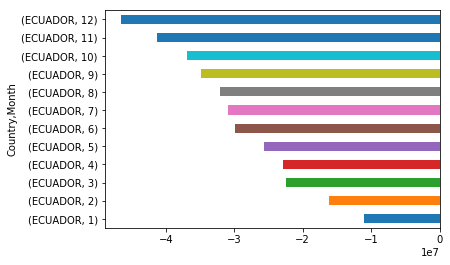

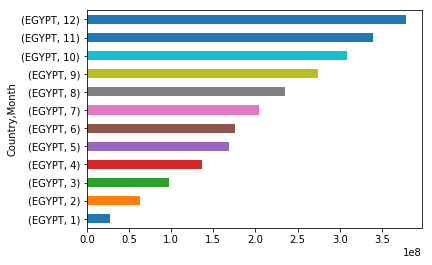

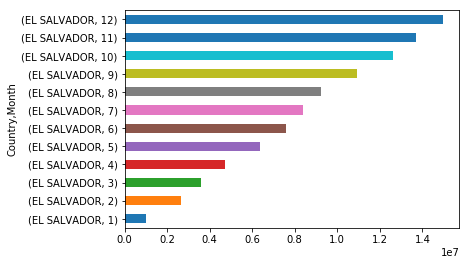

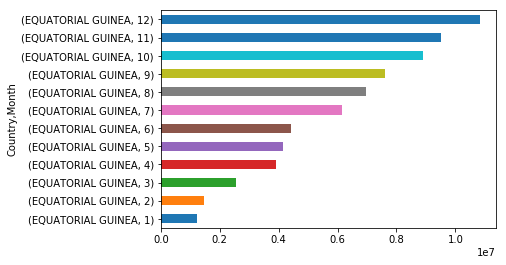

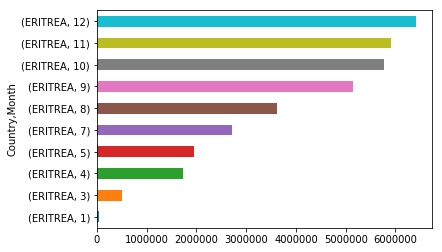

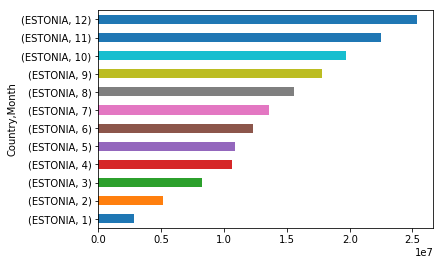

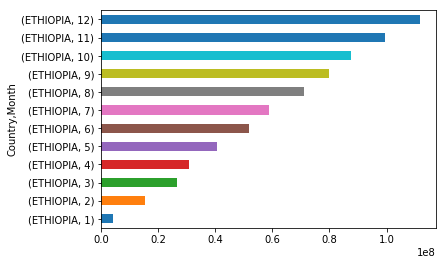

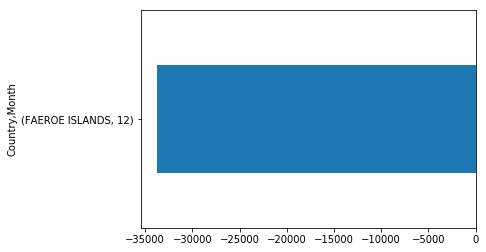

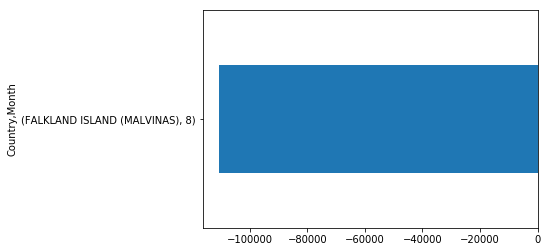

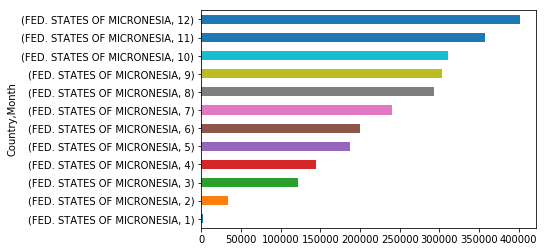

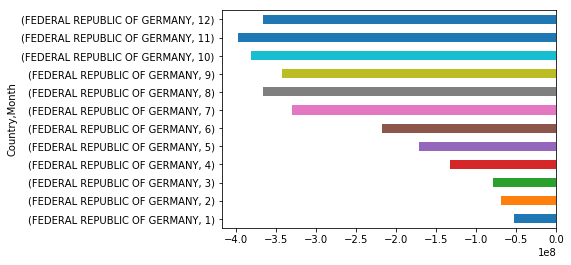

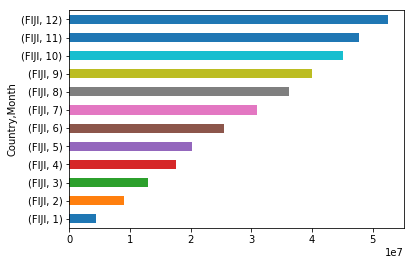

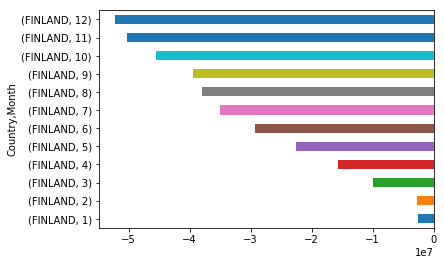

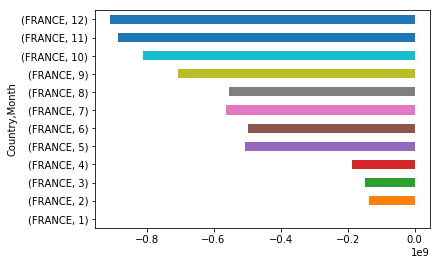

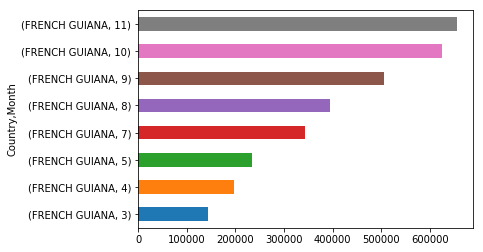

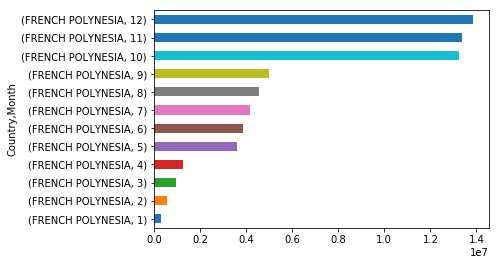

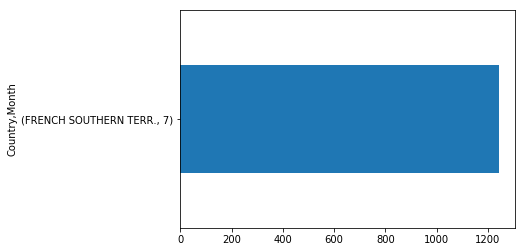

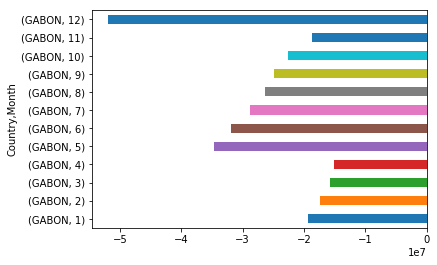

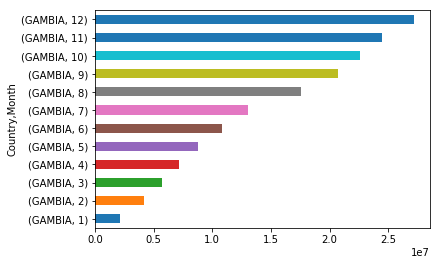

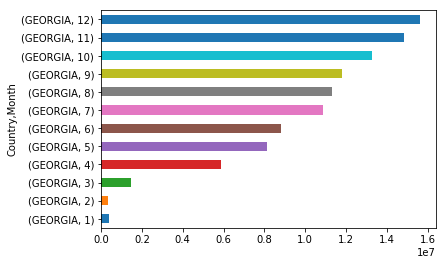

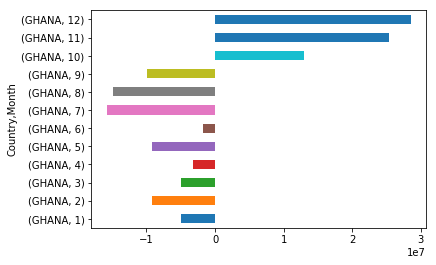

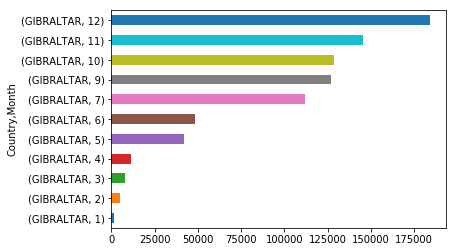

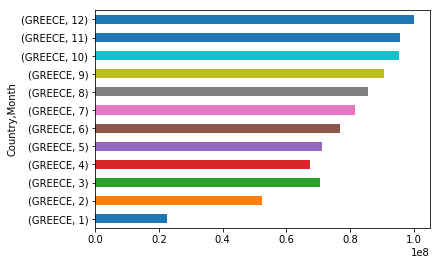

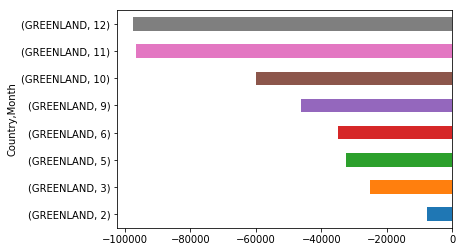

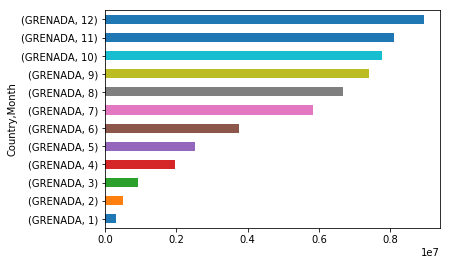

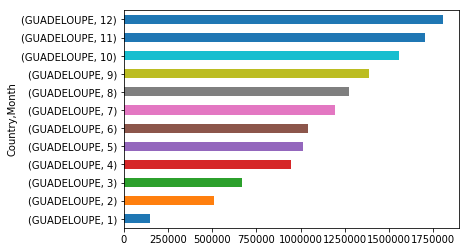

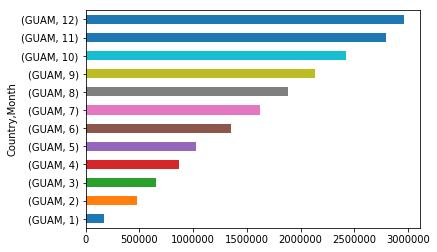

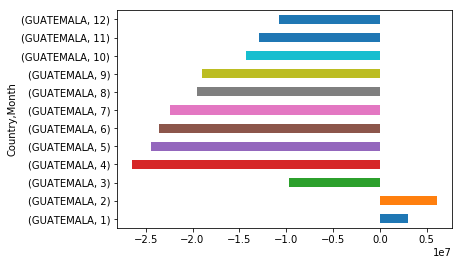

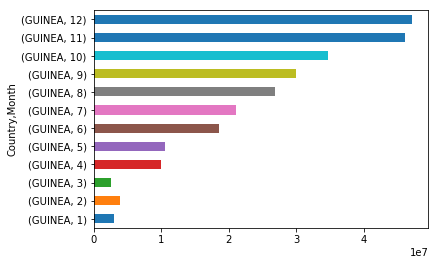

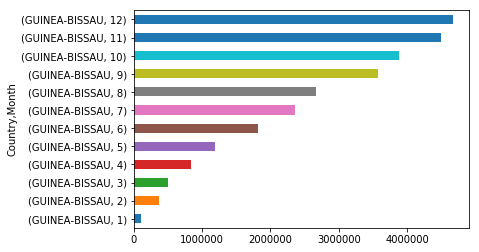

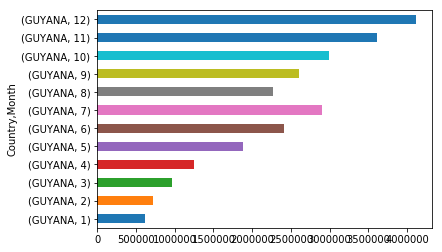

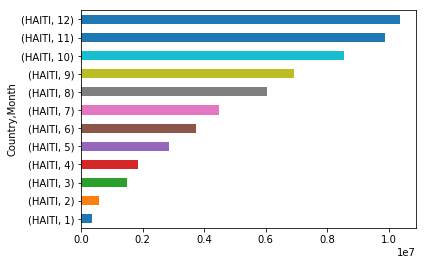

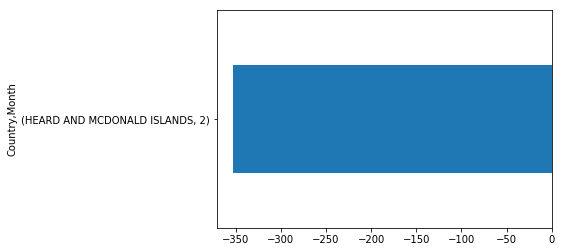

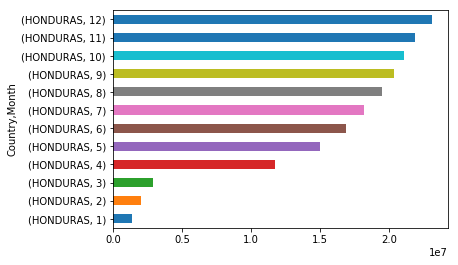

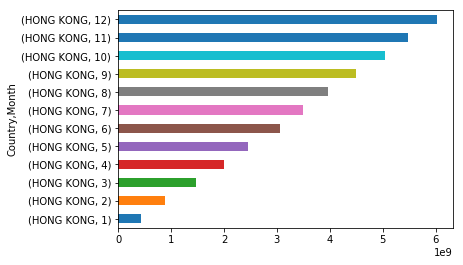

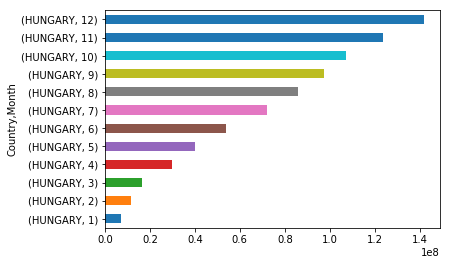

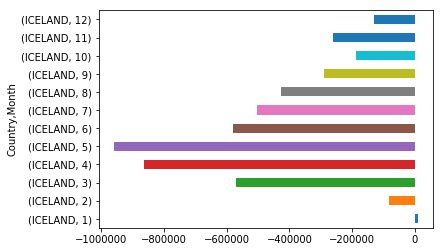

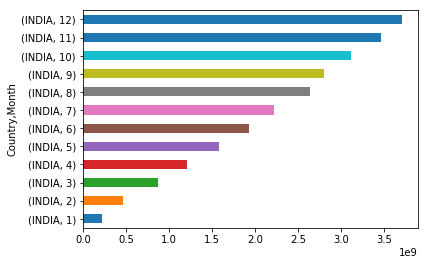

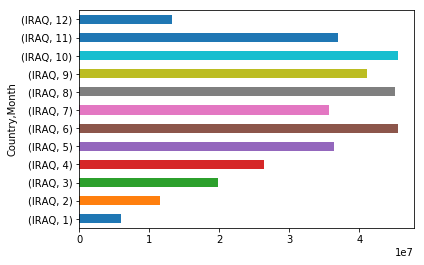

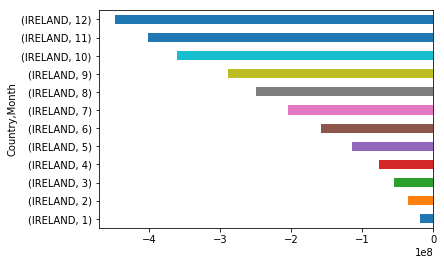

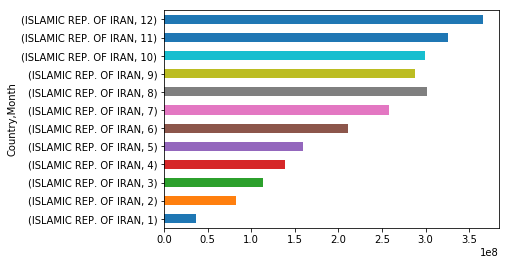

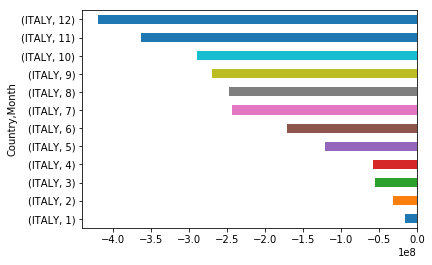

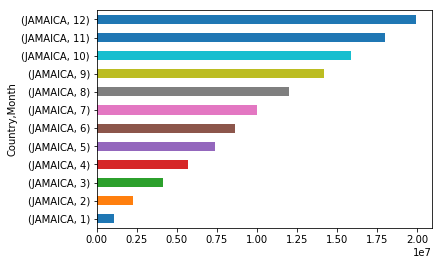

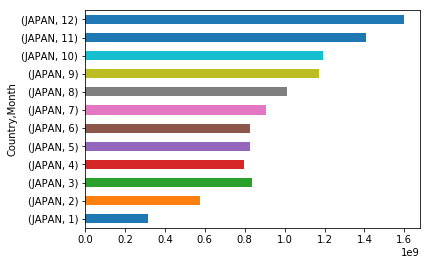

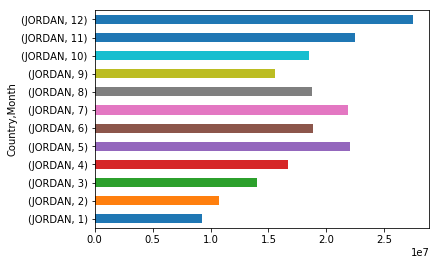

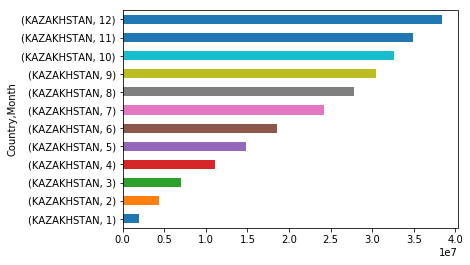

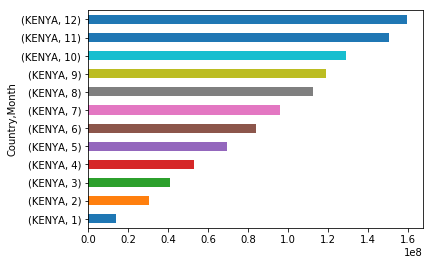

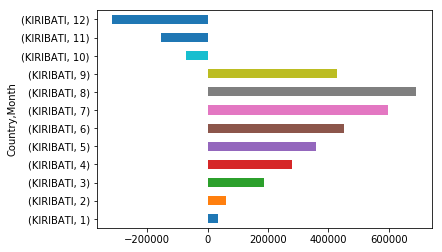

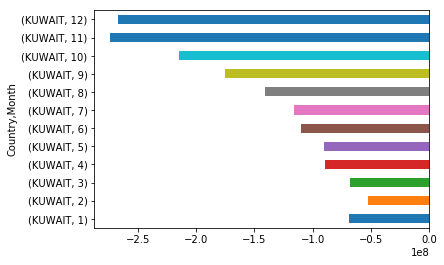

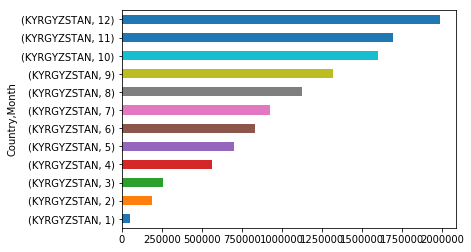

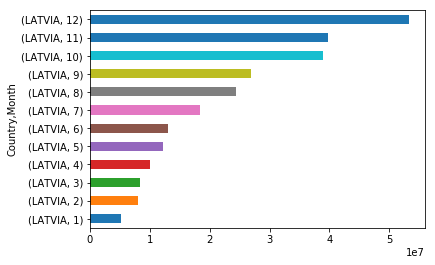

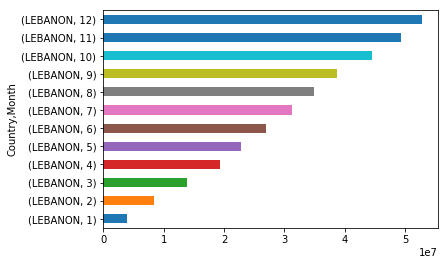

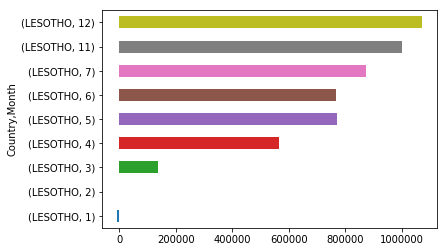

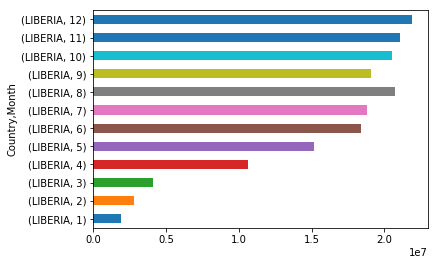

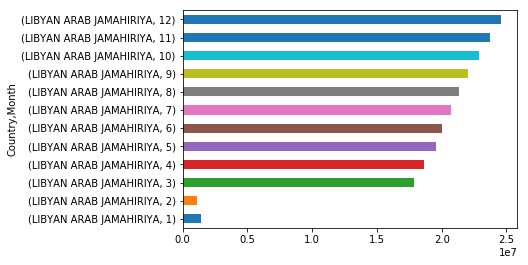

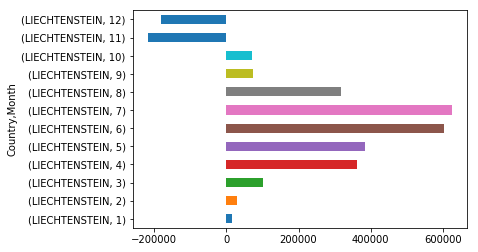

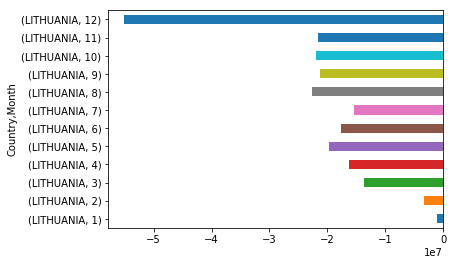

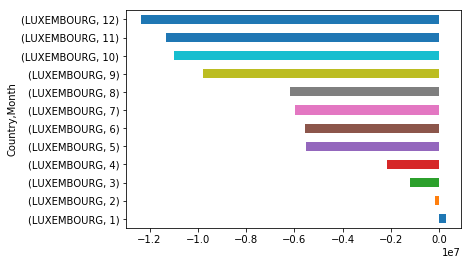

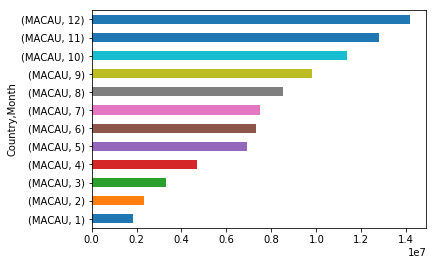

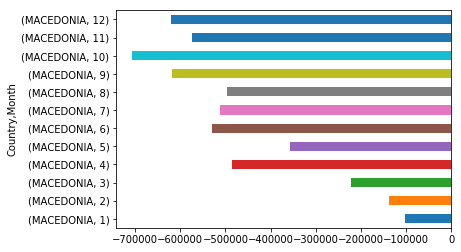

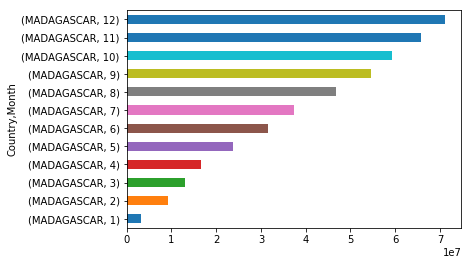

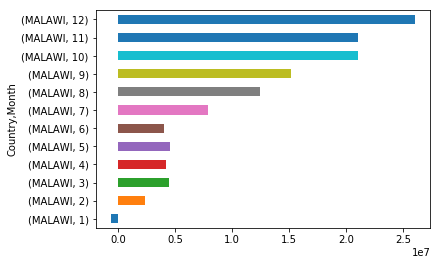

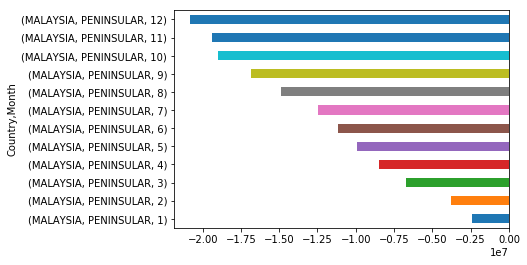

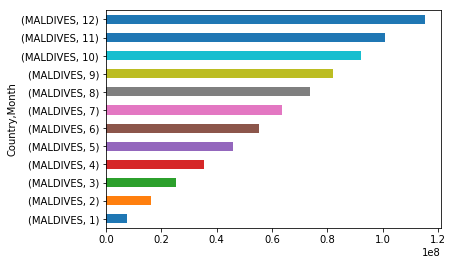

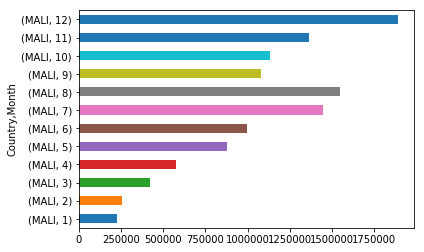

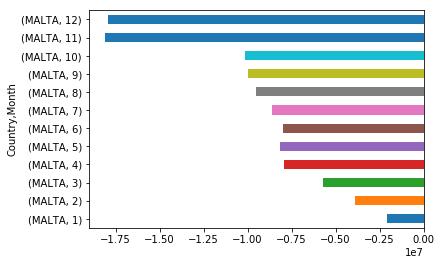

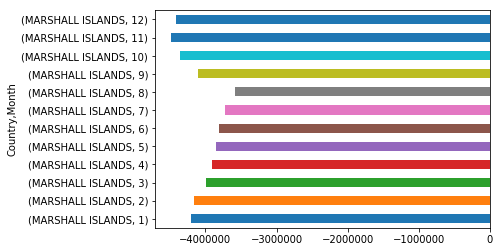

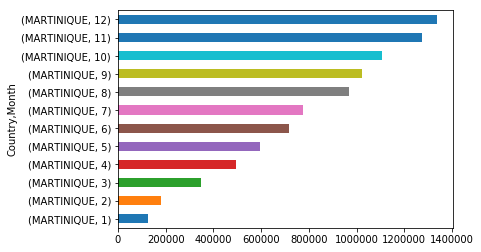

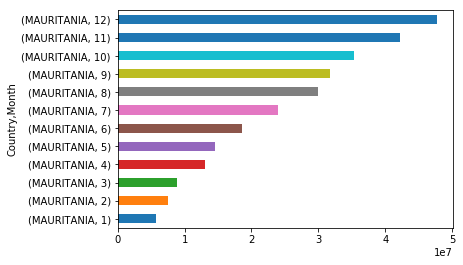

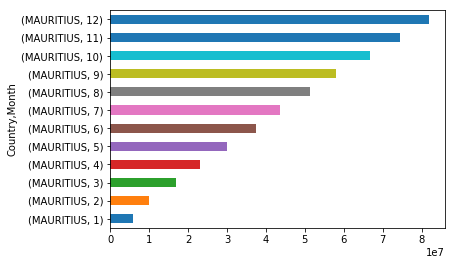

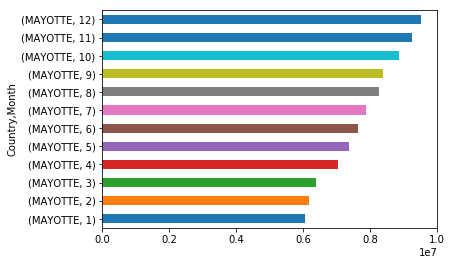

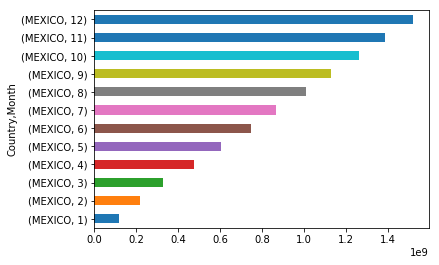

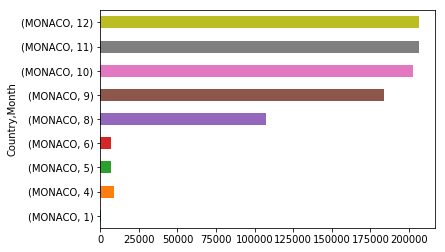

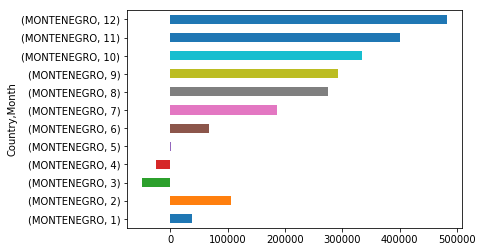

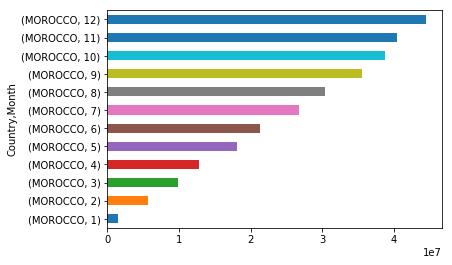

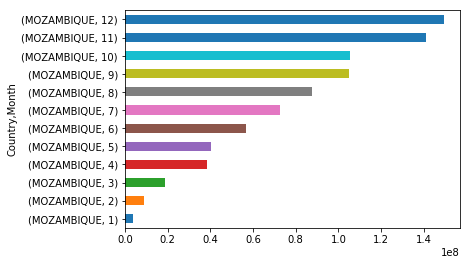

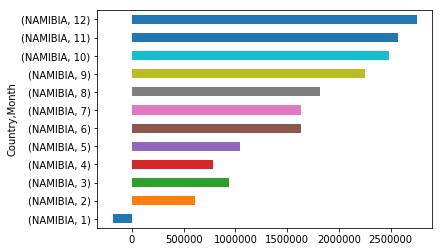

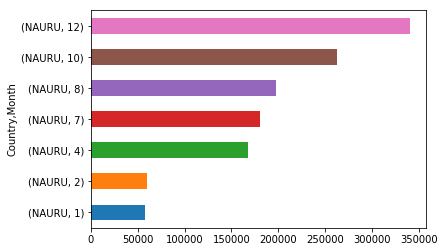

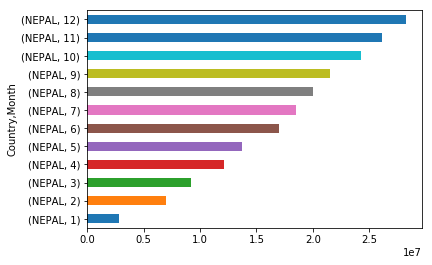

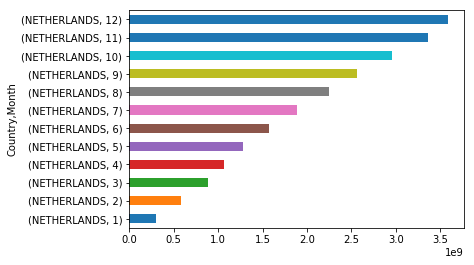

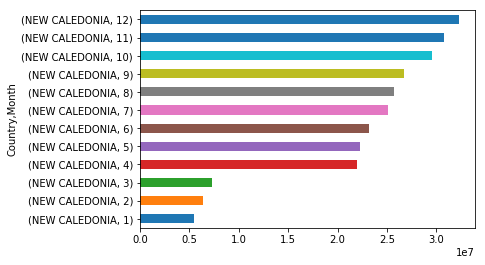

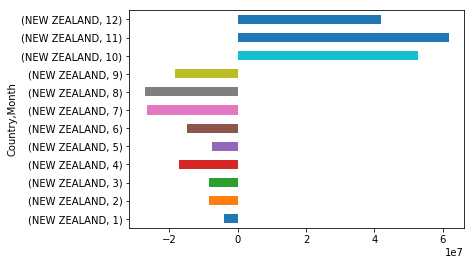

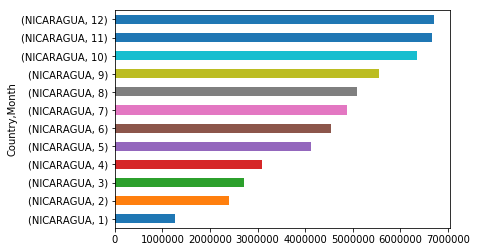

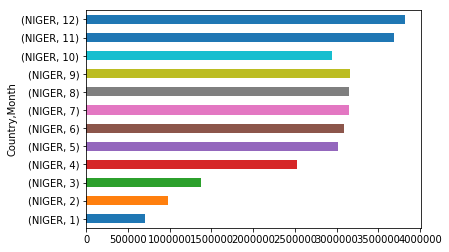

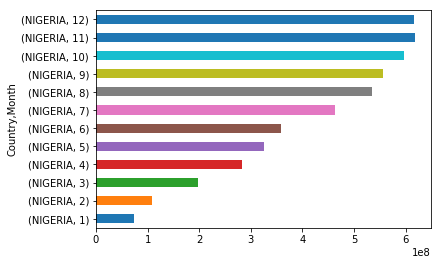

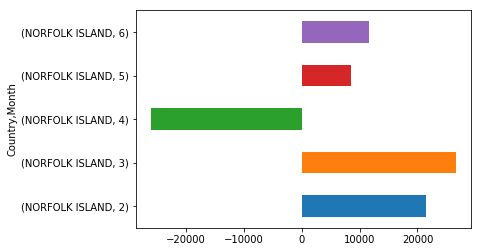

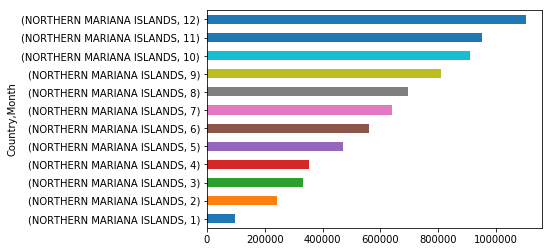

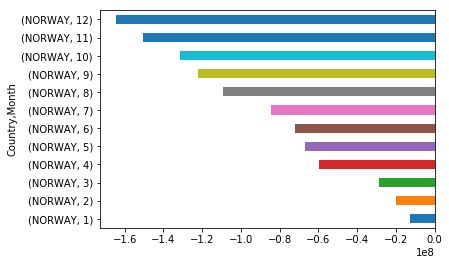

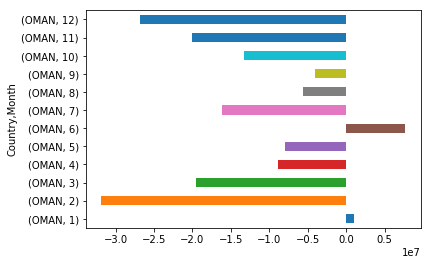

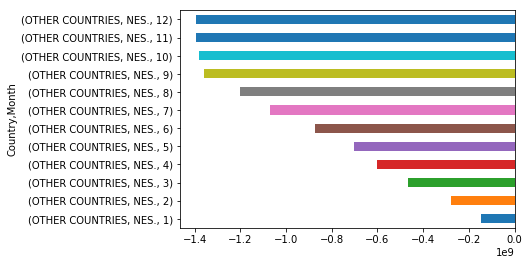

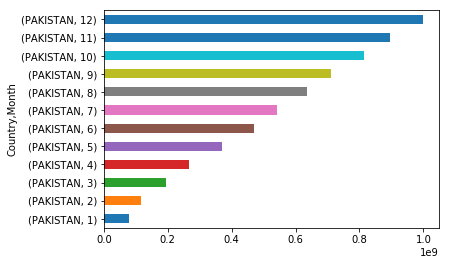

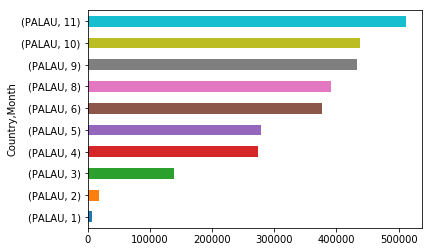

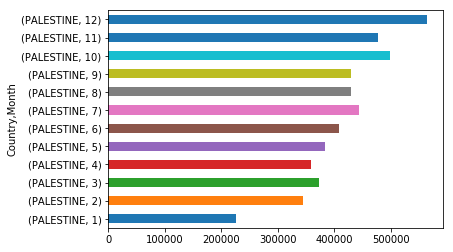

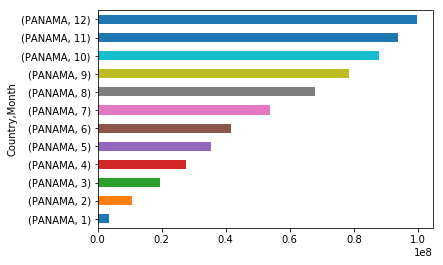

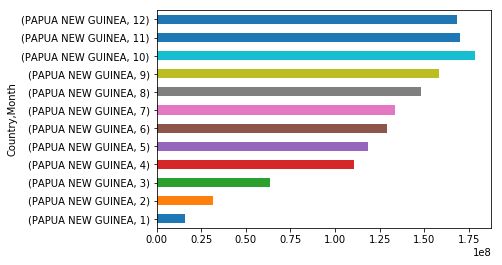

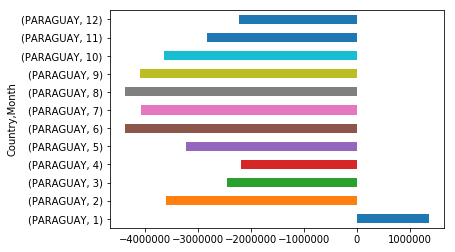

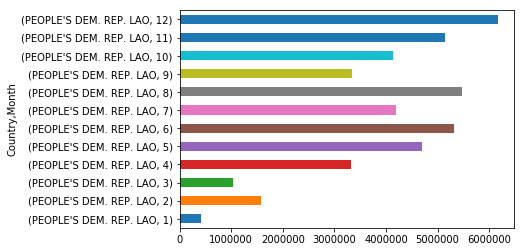

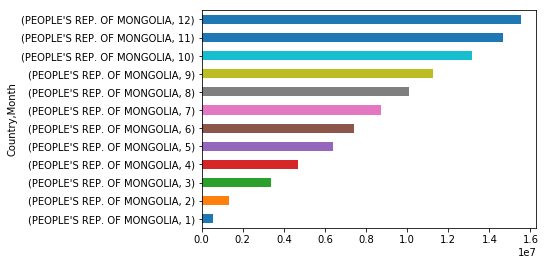

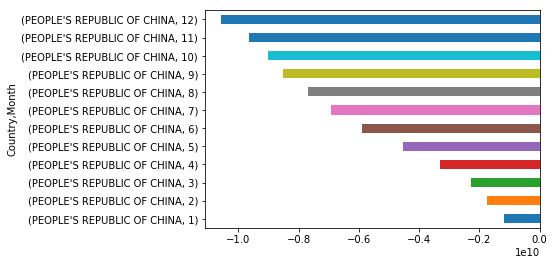

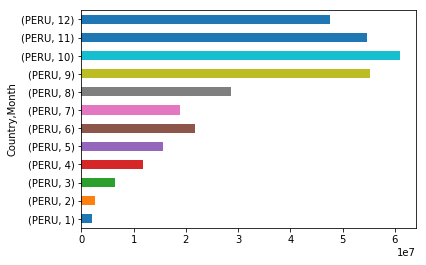

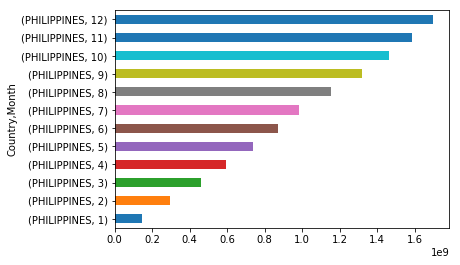

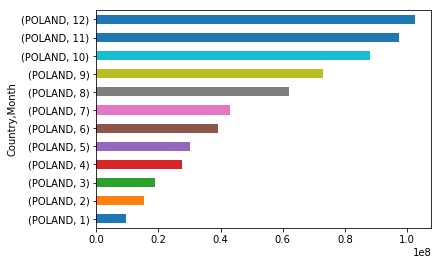

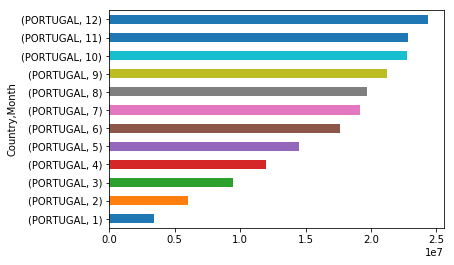

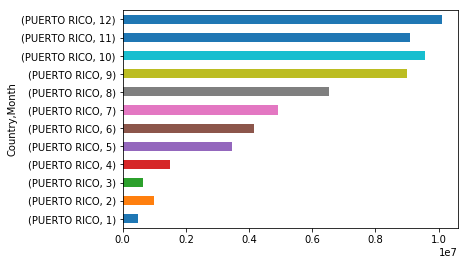

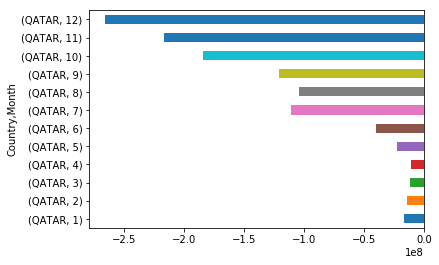

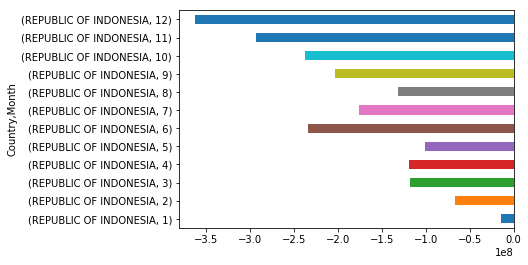

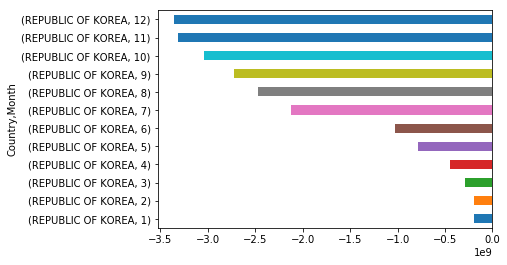

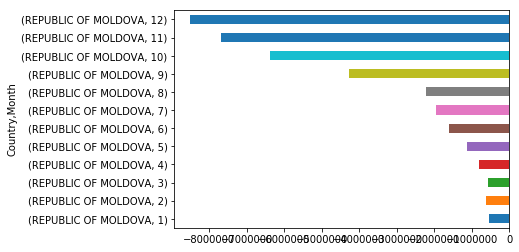

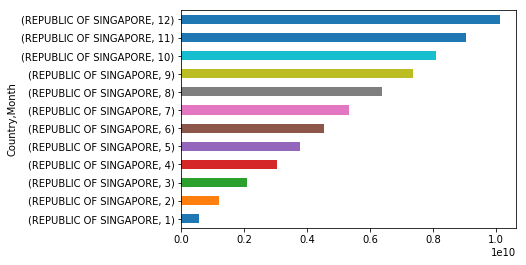

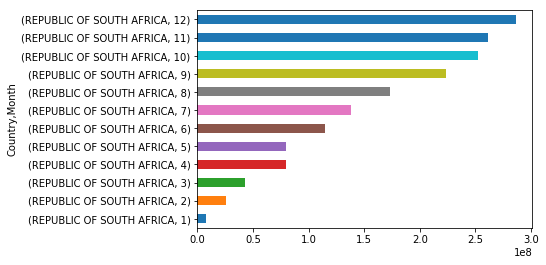

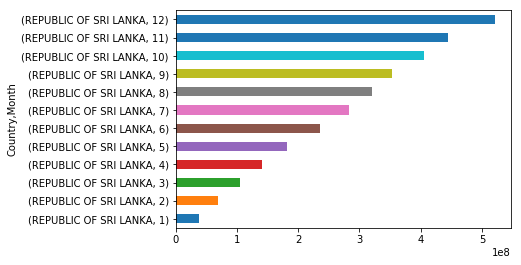

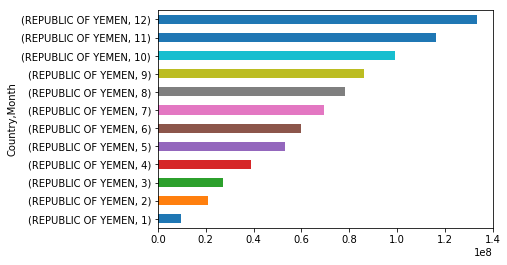

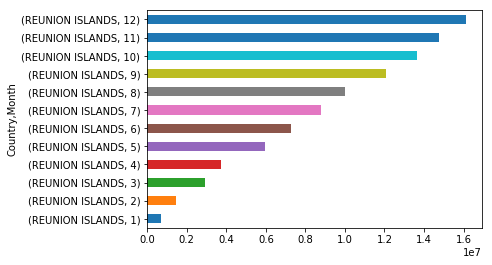

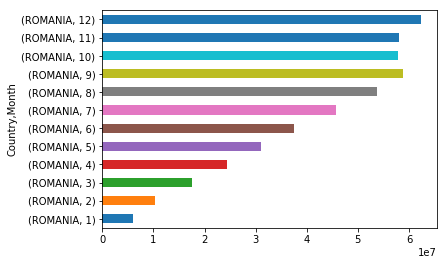

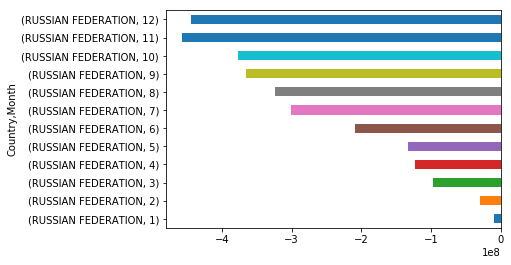

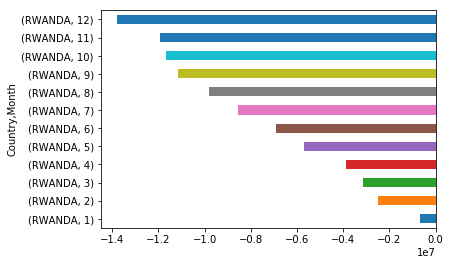

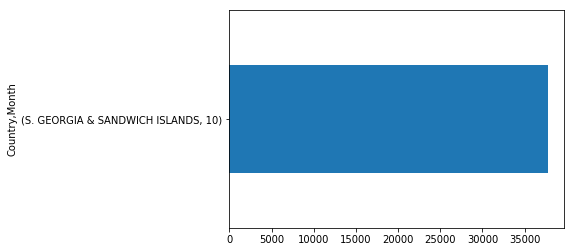

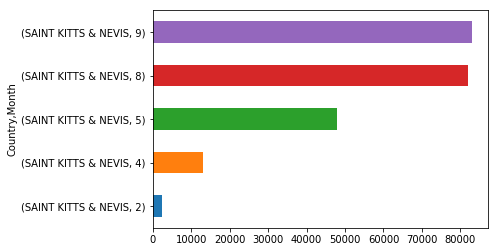

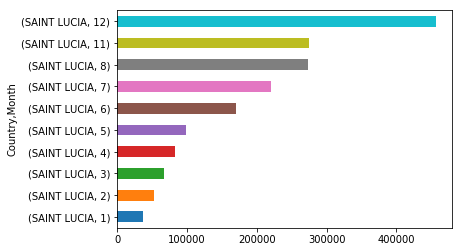

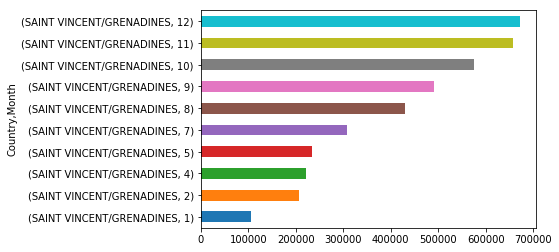

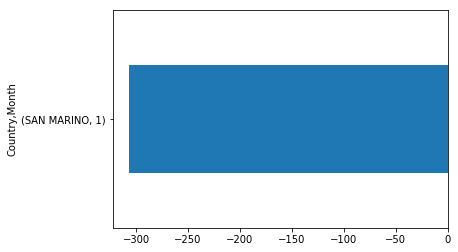

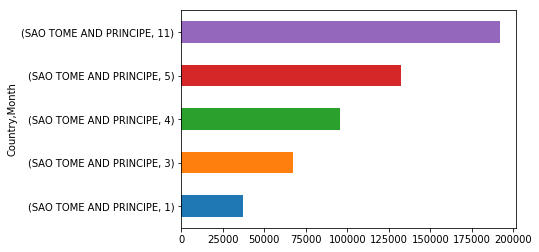

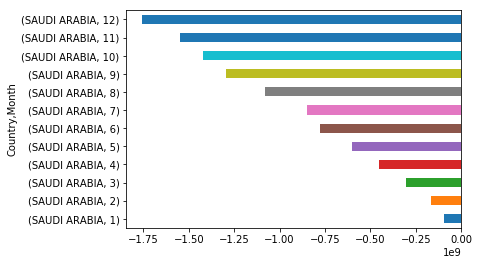

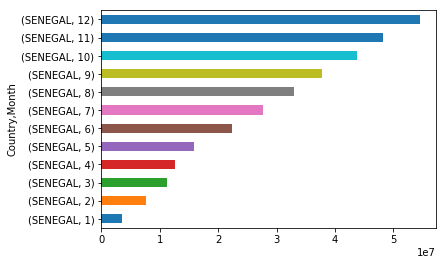

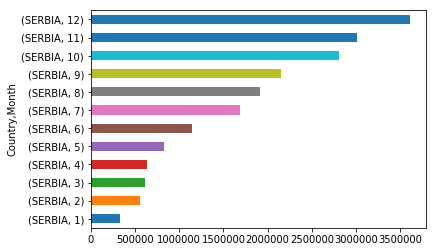

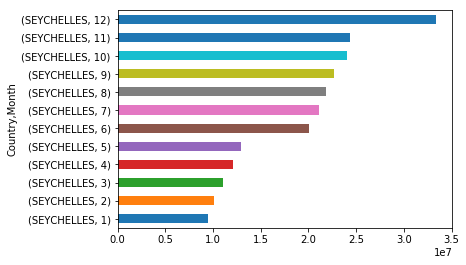

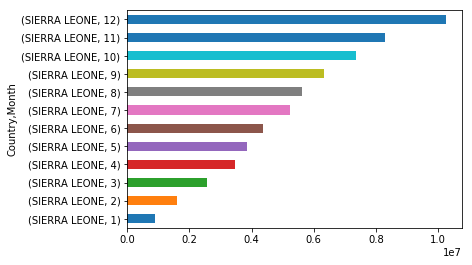

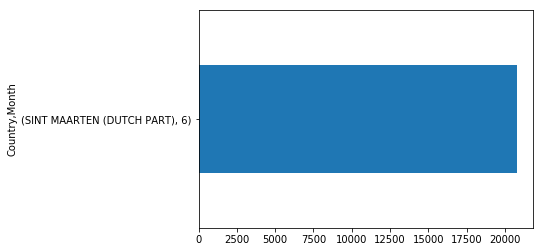

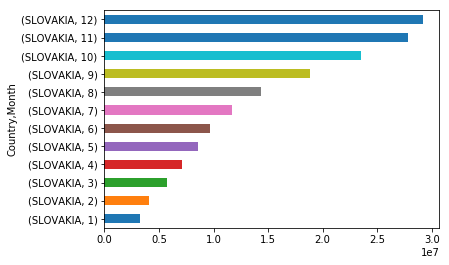

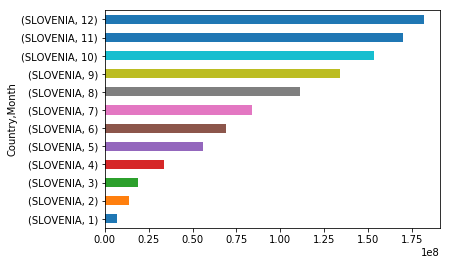

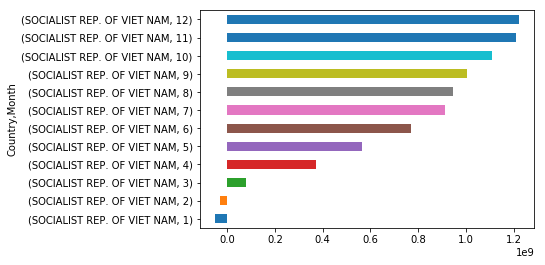

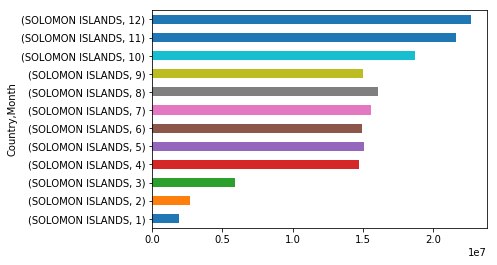

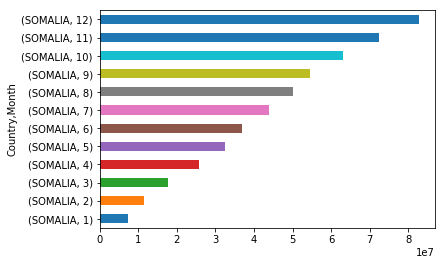

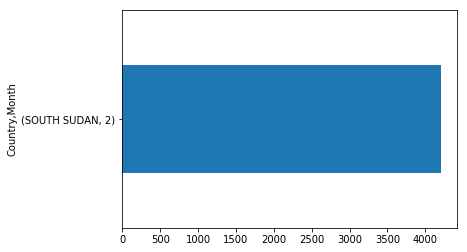

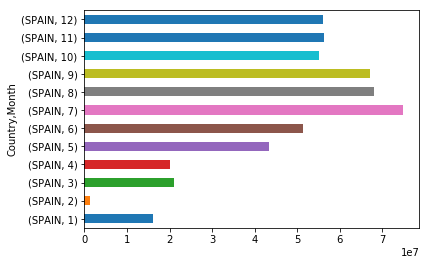

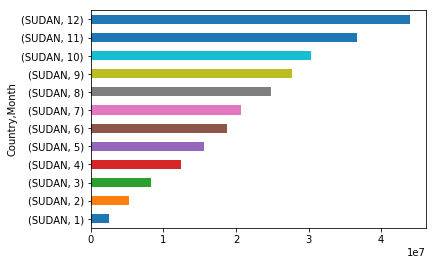

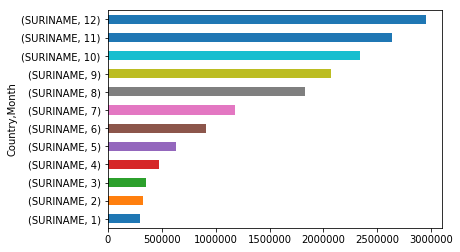

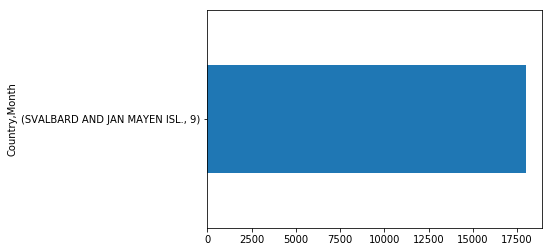

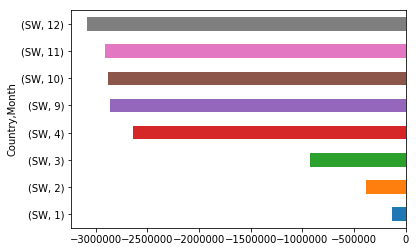

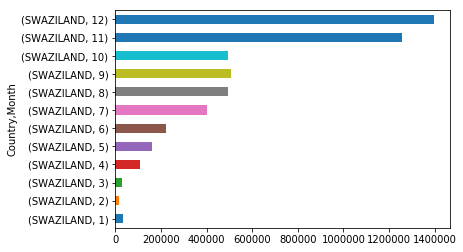

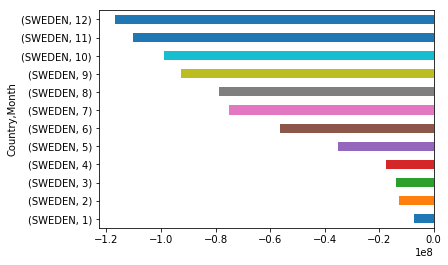

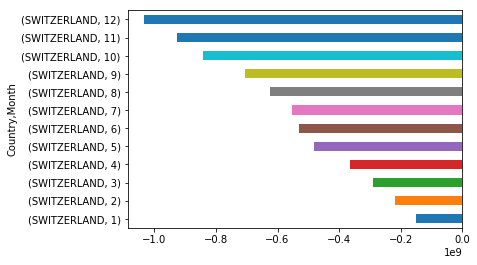

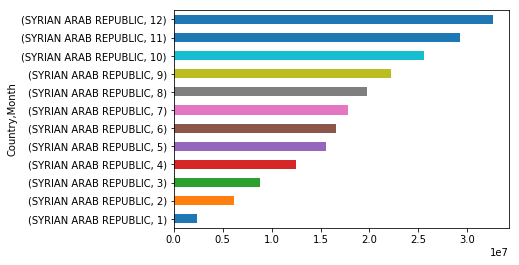

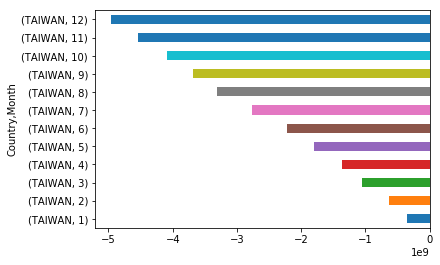

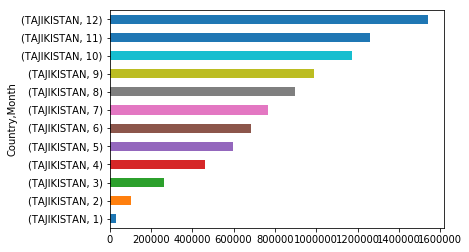

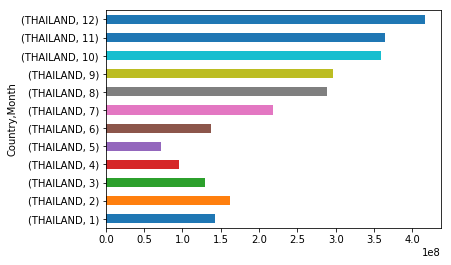

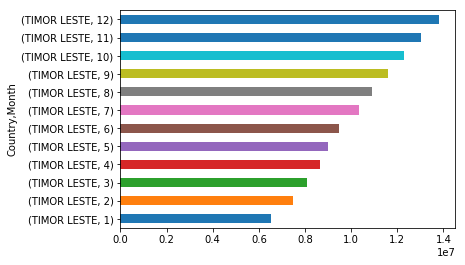

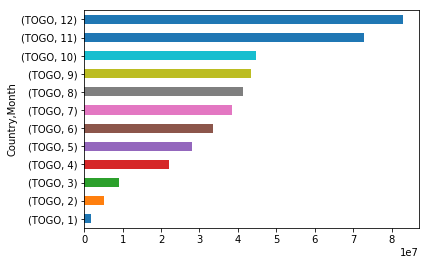

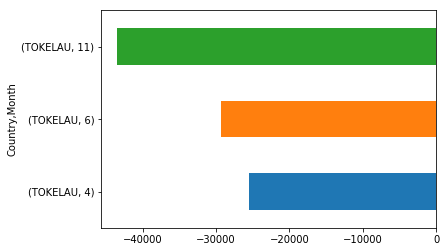

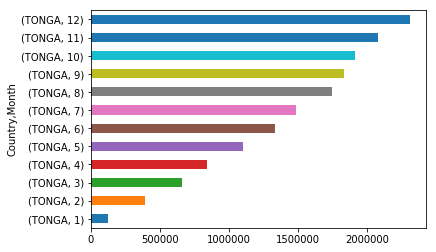

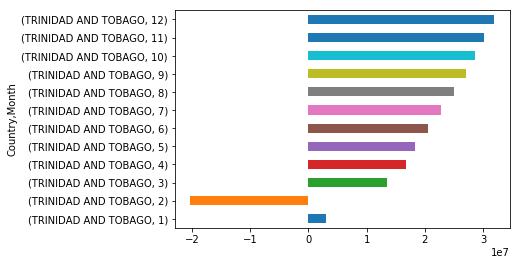

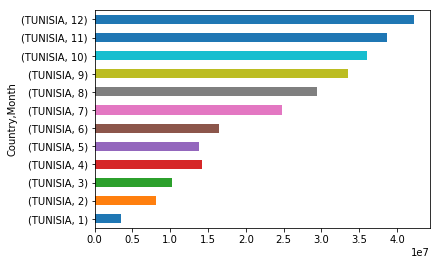

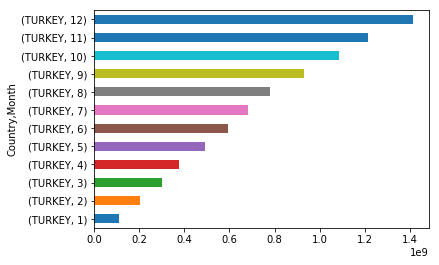

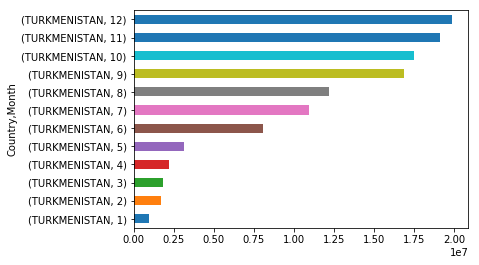

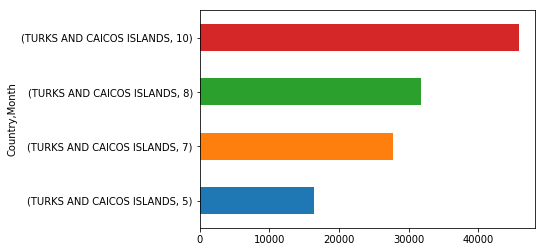

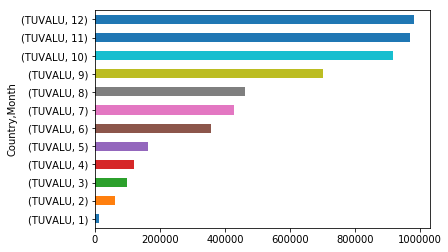

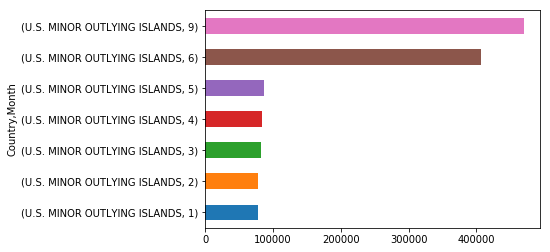

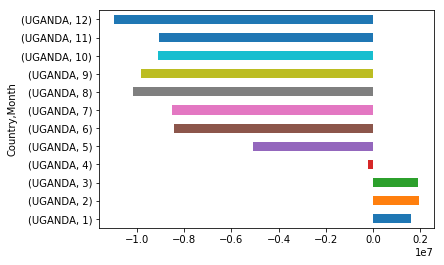

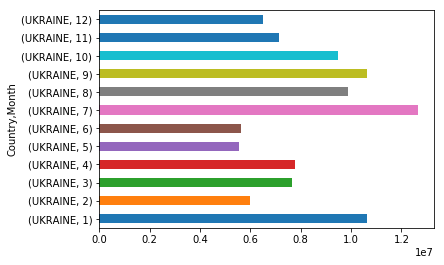

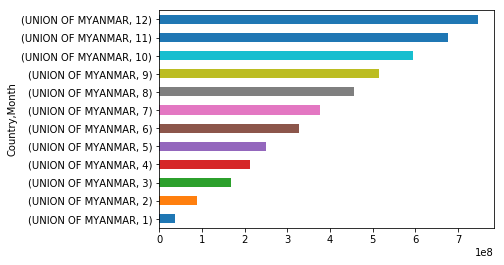

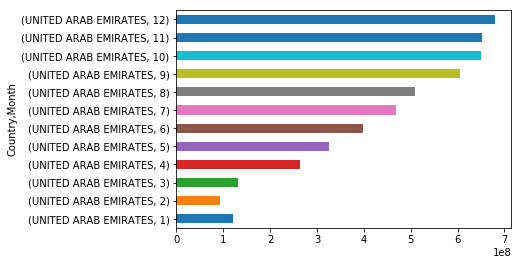

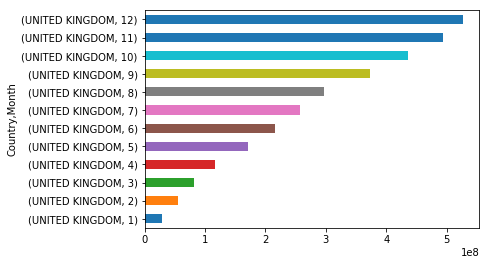

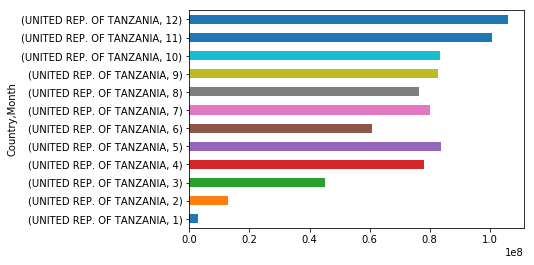

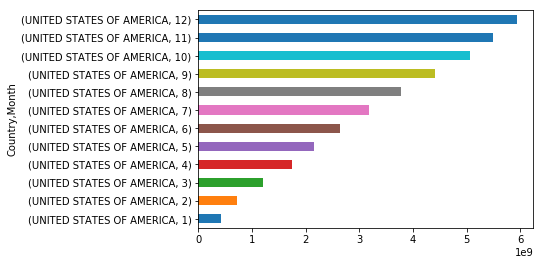

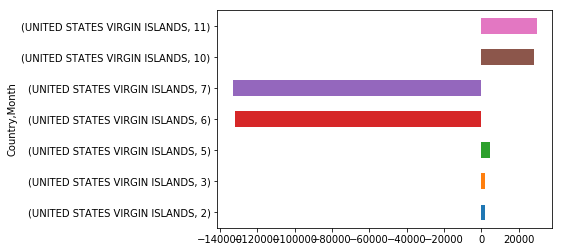

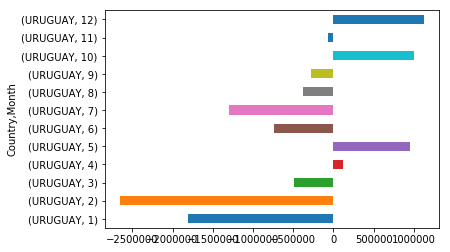

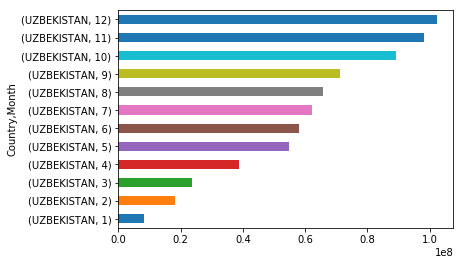

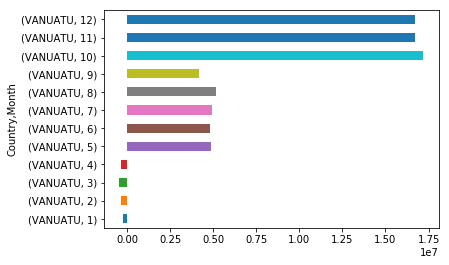

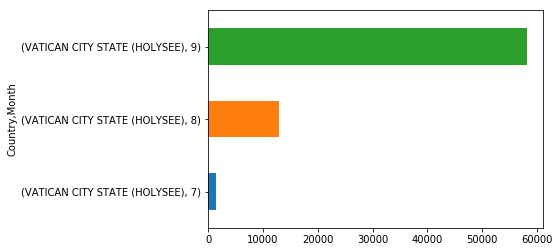

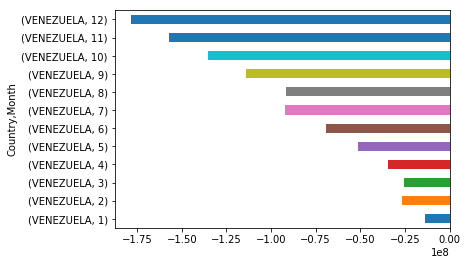

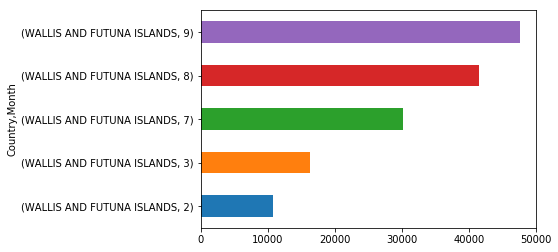

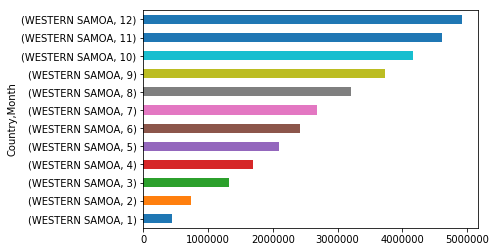

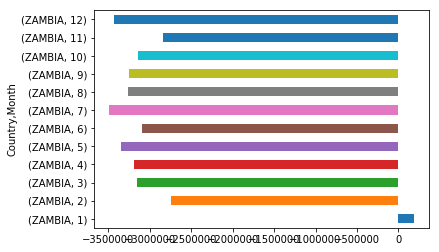

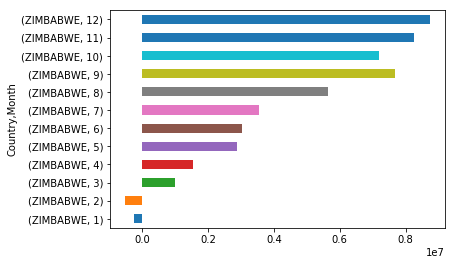

In [7]:
# How would this relate to our Foreign Reserve????

for date, new_df in df.groupby(level=0):
    new_df['Surplus'].cumsum().plot(kind='barh',)
    plt.show()

In [8]:
labels = []
values = []
for col in ['Import','Export']:
    for date, new_df in df.groupby(level=1):
        labels.append(col)
        values.append(np.corrcoef(new_df[col].values, new_df['Surplus'].values)[0,1]) 

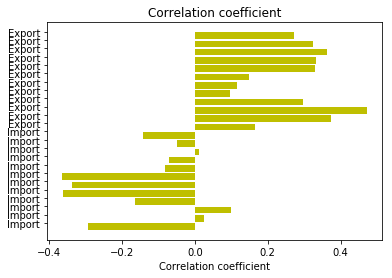

In [9]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.show()

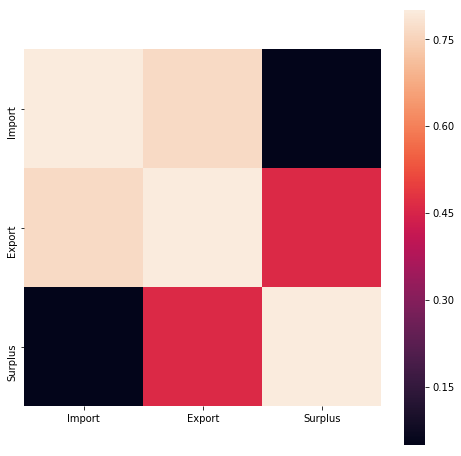

In [10]:
import seaborn as sns

temp_df = df[['Import','Export','Surplus']]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [11]:
# Found nothing conclusive
# Stay Curious
# Nate.C